# Cycle Flow 
## Importing libraries .

In [50]:
from collections import Counter
import numpy as np
import pandas as pd

## Loading Dataset  : FedCycleData071012.csv

In [51]:
data = pd.read_csv('FedCycleData071012.csv', sep=',')
pd.options.mode.chained_assignment = None
len_data = len(data)


# Exploring Data

In [52]:
len_data

1665

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

# Cleaning the Data

In [54]:
patient_data_row_counter = Counter()
for id, row in data['ClientID'].iteritems():
    patient_data_row_counter[row] += 1
per_user_rows = sorted(set(patient_data_row_counter.values()))
print('Unique patients: {}'.format(data['ClientID'].nunique()))
print('Data row count per patient between {} - {}'.format(per_user_rows[0], per_user_rows[-1]))


Unique patients: 159
Data row count per patient between 1 - 45


In [55]:
print('Cycle length between {} - {}'.format(data['LengthofCycle'].min(), data['LengthofCycle'].max()))


Cycle length between 18 - 54


In [56]:
clean_luteal_data = data[data['LengthofLutealPhase'] != ' ']
clean_luteal_data['LengthofLutealPhase'] = pd.to_numeric(clean_luteal_data['LengthofLutealPhase'], downcast='unsigned')
print('Luteal phase length between {} - {} days.'.format(clean_luteal_data['LengthofLutealPhase'].min(),
                                                         clean_luteal_data['LengthofLutealPhase'].max()))
print('{} records are good from {}.'.format(len(clean_luteal_data), len_data))


Luteal phase length between 1 - 41 days.
1514 records are good from 1665.


In [57]:
clean_ovulation_data = data[data['EstimatedDayofOvulation'] != ' ']
clean_ovulation_data['EstimatedDayofOvulation'] = pd.to_numeric(clean_ovulation_data['EstimatedDayofOvulation'], downcast='unsigned')
print('Estimated day of ovulation between {} - {} days.'.format(clean_ovulation_data['EstimatedDayofOvulation'].min(),
                                                                clean_ovulation_data['EstimatedDayofOvulation'].max()))
print('{} records are good from {}.'.format(len(clean_ovulation_data), len_data))


Estimated day of ovulation between 6 - 29 days.
1515 records are good from 1665.


In [58]:
clean_menses_data = data[data['LengthofMenses'] != ' ']
clean_menses_data['LengthofMenses'] = pd.to_numeric(clean_menses_data['LengthofMenses'], downcast='unsigned')
print('Length of menses between {} - {} days.'.format(clean_menses_data['LengthofMenses'].min(),
                                                      clean_menses_data['LengthofMenses'].max()))
print('{} records are good from {}.'.format(len(clean_menses_data), len_data))

Length of menses between 2 - 15 days.
1661 records are good from 1665.


In [59]:
clean_age_data = data[data['AgeM'] != ' ']
clean_age_data['Age'] = pd.to_numeric(clean_age_data['Age'], downcast='unsigned')
print('Age between {} - {} years.'.format(clean_age_data['Age'].min(),
                                          clean_age_data['Age'].max()))
print('{} records are good from {}.'.format(len(clean_age_data), len_data))
age_of_patient = {}
for id, row in clean_age_data[['ClientID', 'Age']].iterrows():
    if row['ClientID'] not in age_of_patient.keys():
        age_of_patient[row['ClientID']] = row['Age']
    else:
        if age_of_patient[row['ClientID']] != row['Age']:
            print('[!] User {} has different age values old: {}, new {}.'.format(row['ClientID'],
                                                                                 age_of_patient[row['ClientID']],
                                                                                 row['Age']))
print('{} patients have age value.'.format(len(age_of_patient)))

Age between 21 - 43 years.
142 records are good from 1665.
138 patients have age value.


In [60]:
clean_data = data[data['LengthofLutealPhase'] != ' ']
clean_data = clean_data[clean_data['EstimatedDayofOvulation'] != ' ']
clean_data = clean_data[clean_data['LengthofMenses'] != ' ']
clean_data = clean_data[['Age','LengthofCycle', 'LengthofLutealPhase', 'EstimatedDayofOvulation', 'LengthofMenses']]
for i, key in enumerate(patient_data_row_counter.keys()):
    clean_data = clean_data.replace(key, i)

clean_data.info()
print('Count of records: {}'.format(len(clean_data)))
clean_data.to_csv('clean_dataset.csv', sep=',', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1663
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1512 non-null   object
 1   LengthofCycle            1512 non-null   int64 
 2   LengthofLutealPhase      1512 non-null   object
 3   EstimatedDayofOvulation  1512 non-null   object
 4   LengthofMenses           1512 non-null   object
dtypes: int64(1), object(4)
memory usage: 70.9+ KB
Count of records: 1512


In [61]:
clean_data.head()

,Age,LengthofCycle,LengthofLutealPhase,EstimatedDayofOvulation,LengthofMenses
0,36,29,12,17,5
1,,27,12,15,5
2,,29,14,15,5
3,,27,12,15,5
4,,28,12,16,5


In [32]:
import base64
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

df = pd.DataFrame(data = clean_data )
create_download_link(df)

In [76]:
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline 
import warnings   
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_csv("data.csv")

In [66]:
df.head()

,Unnamed: 0,Age,LengthofCycle,LengthofLutealPhase,EstimatedDayofOvulation,LengthofMenses
0,0,36,29,12,17,5
1,1,,27,12,15,5
2,2,,29,14,15,5
3,3,,27,12,15,5
4,4,,28,12,16,5


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1512 non-null   int64 
 1   Age                      1512 non-null   object
 2   LengthofCycle            1512 non-null   int64 
 3   LengthofLutealPhase      1512 non-null   int64 
 4   EstimatedDayofOvulation  1512 non-null   int64 
 5   LengthofMenses           1512 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 71.0+ KB


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Unnamed: 0'),
  Text(0, 1.5, 'LengthofCycle'),
  Text(0, 2.5, 'LengthofLutealPhase'),
  Text(0, 3.5, 'EstimatedDayofOvulation'),
  Text(0, 4.5, 'LengthofMenses')])

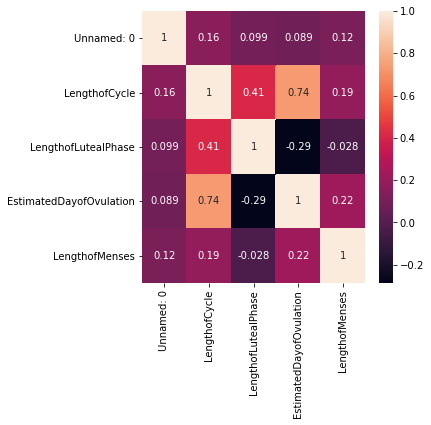

In [69]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.yticks(rotation=0)

<AxesSubplot:xlabel='LengthofCycle', ylabel='EstimatedDayofOvulation'>

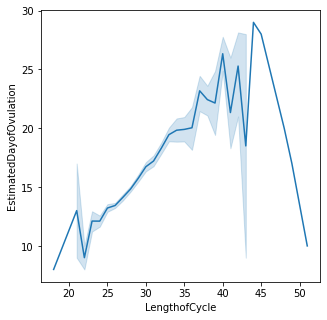

In [73]:
plt.figure(figsize =(5,5))
sns.lineplot(x = df['LengthofCycle'],y = df['EstimatedDayofOvulation'])

<AxesSubplot:xlabel='LengthofLutealPhase', ylabel='EstimatedDayofOvulation'>

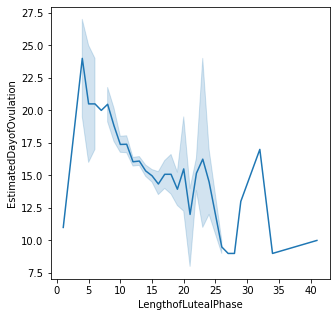

In [74]:
plt.figure(figsize =(5,5))
sns.lineplot(x = df['LengthofLutealPhase'],y = df['EstimatedDayofOvulation'])

<AxesSubplot:xlabel='LengthofMenses', ylabel='EstimatedDayofOvulation'>

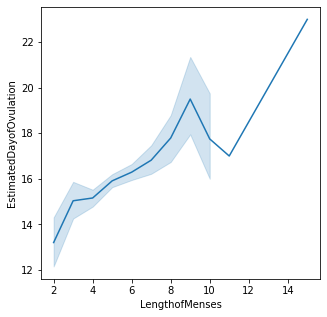

In [75]:
plt.figure(figsize =(5,5))
sns.lineplot(x = df['LengthofMenses'],y = df['EstimatedDayofOvulation'])

<AxesSubplot:xlabel='LengthofCycle', ylabel='EstimatedDayofOvulation'>

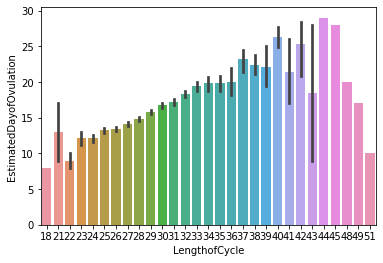

In [77]:
sns.barplot(x = df['LengthofCycle'],y = df['EstimatedDayofOvulation'])

<AxesSubplot:xlabel='LengthofLutealPhase', ylabel='EstimatedDayofOvulation'>

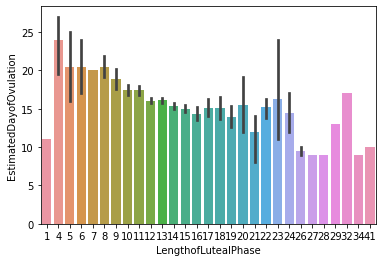

In [78]:
sns.barplot(x = df['LengthofLutealPhase'],y = df['EstimatedDayofOvulation'])

<AxesSubplot:xlabel='LengthofMenses', ylabel='EstimatedDayofOvulation'>

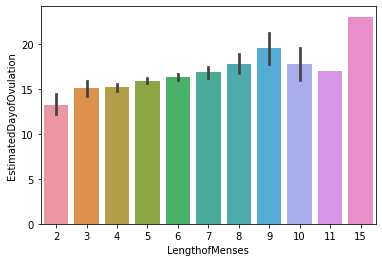

In [79]:
sns.barplot(x = df['LengthofMenses'],y = df['EstimatedDayofOvulation'])

From all this Exploratory Data Analysis We get out Target Variable on which Day of Ovulation Depends : Age , Length of Cycle , Length of Menses and Length of LutealPhase. 